In [70]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [71]:
# Step 1: Load the data into a pandas DataFrame
mcdonalds = pd.read_csv("/content/sample_data/mcdonalds.csv")
mcdonalds1 = pd.read_csv("/content/sample_data/mcdonalds.csv")

In [72]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [73]:
mcdonalds.shape

(1453, 15)

In [74]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


There is 1 numerical column and 13 categorical columns.

In [75]:
# Checking Duplicate Data
mcdonalds.duplicated().sum()

22

In [76]:
any_null = mcdonalds.isnull().values.any()
print("Are there any null values in the DataFrame? ", any_null)

Are there any null values in the DataFrame?  False


In [77]:
#Getting the value counts of 'VisitFrequency'
mcdonalds['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [114]:
mcdonalds.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1453.0,44.604955,14.221178,18.0,33.0,45.0,57.0,71.0
Like.n,1453.0,0.777013,3.116842,-5.0,-1.0,1.0,3.0,5.0


*   Mean Age of customers : 45.
*   Minimum Age is 18 whereas maximum Age is 71.

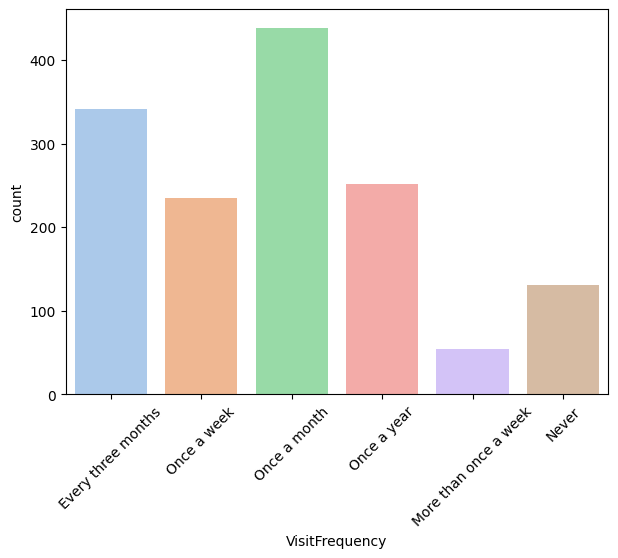

In [78]:
sns.countplot(x=mcdonalds['VisitFrequency'], palette='pastel')
plt.xticks(rotation=45)
plt.show()


In [79]:
# Step 2: Extract the first eleven columns containing the segmentation variables and Convert YES/NO to binary values
MD_x = mcdonalds.iloc[:, :11].replace({'Yes': 1, 'No': 0})

In [115]:
# Step 3: Verify the transformation by inspecting the average values
Mean = MD_x.mean().round(2)

print("Binary Segmentation Variables:\n", MD_x.head(3))
print("\nAverage Values of Each Segmentation Variable:\n", Mean)

Binary Segmentation Variables:
    yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   

   healthy  disgusting  
0        0           0  
1        0           0  
2        1           0  

Average Values of Each Segmentation Variable:
 yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


The average values of the transformed binary numeric segmentation variables indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY,
91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that McDonald’s food is SPICY.

In [80]:
# STEP 4: We use unstandardised data because our segmentation variables are all binary.
pca = PCA()
MD_pca = pca.fit_transform(MD_x) # calculates new scaling parameters and transforms the test data in one step
MD_p=pca.fit(MD_x) # calculates the scaling parameters (mean and standard deviation) on the MD_x data; TO BE USED LATER

In [81]:
# Step 5: Print summary similar to R's summary(prcomp)
SD = np.sqrt(pca.explained_variance_)
EV = pca.explained_variance_ratio_  # tells how much of the total variance is captured by each principal component.
CEV = EV.cumsum() # cumulative_explained_variance Helps determine the number of components to retain to capture the desired amount of total variance.

summary_df = pd.DataFrame({
    'Standard deviation' : SD, 'Proportion of Variance': EV, 'Cumulative Proportion': CEV}).T.round(4)

summary_df.columns = [f'PC{i}' for i in range(1, pca.n_components_ + 1)]
print("\nSummary DataFrame:")
summary_df


Summary DataFrame:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard deviation,0.7570,0.6075,0.5046,0.3988,0.3374,0.3103,0.2897,0.2751,0.2653,0.2488,0.2369
Proportion of Variance,0.2994,0.1928,0.1330,0.0831,0.0595,0.0503,0.0438,0.0395,0.0368,0.0324,0.0293
Cumulative Proportion,0.2994,0.4922,0.6253,0.7084,0.7679,0.8182,0.8620,0.9016,0.9383,0.9707,1.0000


Results from principal components analysis indicate that the first two components capture about 50% of the information contained in the segmentation variables. The following command returns the factor loadings:

In [116]:
print("Standard Deviation:\n",SD.round(1))

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [117]:
# Get the loadings (components)
load = pca.components_

In [119]:
rot_matrix = MD_p.components_.T

# Create DataFrame for loadings
loadings_df = pd.DataFrame(-rot_matrix,
                           columns=[f'PC{i}' for i in range(1, MD_p.n_components_ + 1)],
                           index=MD_x.columns.values)

# Print the loadings DataFrame rounded to 1 decimal place
loadings_df.round(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


The two segmentation variables with the highest loadings (in absolute
terms) for PC2 are CHEAP and EXPENSIVE, indicating that this
principal component captures the price dimension.

The signs of the principal components (loadings) are arbitrary because the direction of the eigenvectors can be reversed without changing the results of PCA.

In [82]:
!pip install bioinfokit

# https://reneshbedre.github.io/blog/howtoinstall.html

In [83]:
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

In [84]:
# Set proportions for var1 and var2
v1 = EV[0].round(2)  # Proportion of variance explained by PC1
v2 = EV[1].round(2)  # Proportion of variance explained by PC2

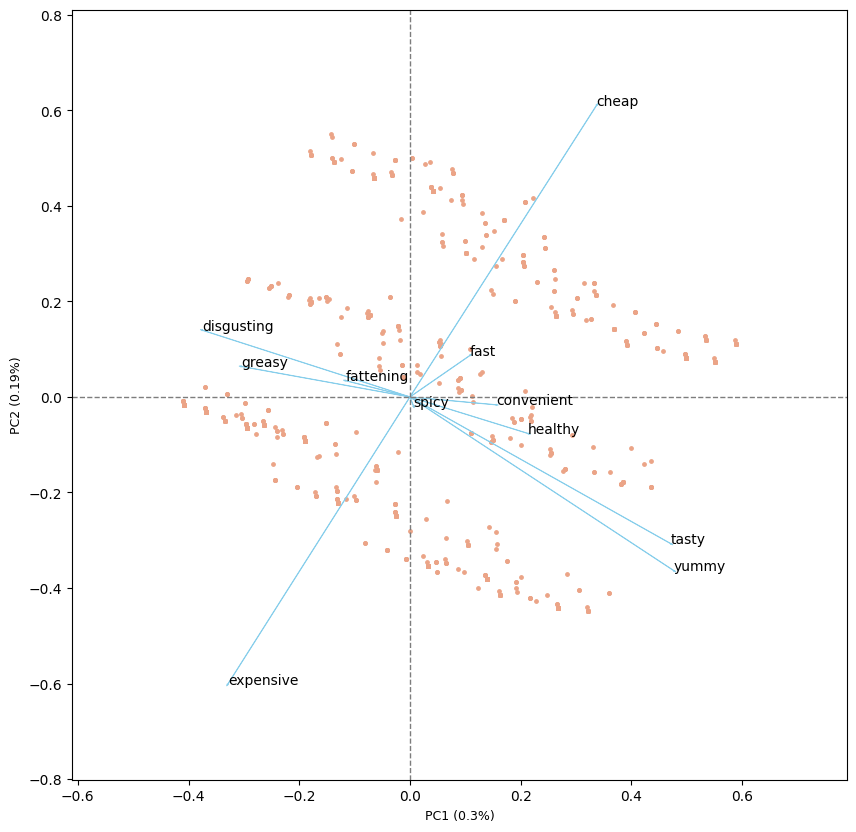

In [85]:
cluster.biplot(cscore=MD_pca, loadings=-pca.components_, labels=mcdonalds.columns.values,var1=v1,var2=v2, show=True, dim=(10, 10))

Results indicate that some attributes are strongly related to one another,
and that the price dimension may be critical in differentiating between groups of
consumers.

# Step 5: Extracting Segments

To illustrate a range of extraction techniques,
we subdivide this step into 3 sections:
1. standard k-means analysis
2. finite mixtures of binary distributions
3. finite mixtures of regressions.

### 5.1 Using k-Means

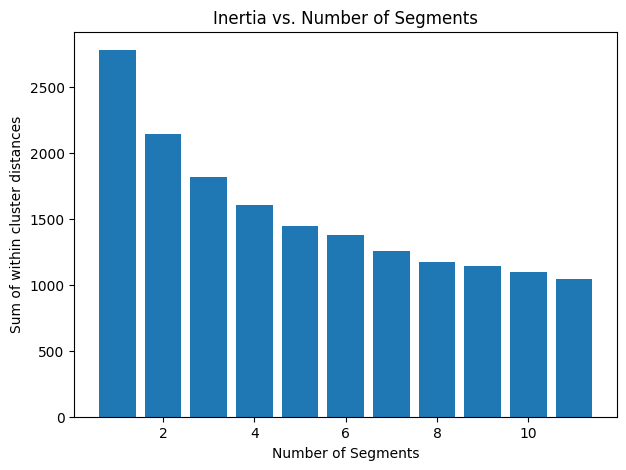

In [86]:
WCSS =[]

# Dictionary to store k-means models for each k
kmeans_data = {}

# Perform k-means clustering for 2 to 8 segments with 10 random restarts
for k in range(1, 12):
    # Initialize the k-means model
    kmeans = KMeans(n_clusters= k, n_init=10, random_state=42)

    # Apply the k-means algorithm to the data MD_x
    kmeans.fit(MD_x)

    # Append the inertia (within-cluster sum of squares) to the list
    WCSS.append(kmeans.inertia_)

    # Store the fitted model in the dictionary with the number of clusters as the key.
    kmeans_data[str(k)] = kmeans


# Plot the inertia values
plt.bar(range(1, 12), WCSS)
plt.xlabel('Number of Segments')
plt.ylabel('Sum of within cluster distances')
plt.title('Inertia vs. Number of Segments')
plt.show()

The much anticipated point where the sum of distances
drops dramatically is not visible. This scree plot does not provide useful guidance on the number of market segments to extract.

### Global stability is the extent to which the same segmentation solution emerges if the analysis is repeated many times using bootstrap samples (randomly drawn subsets) of the data.

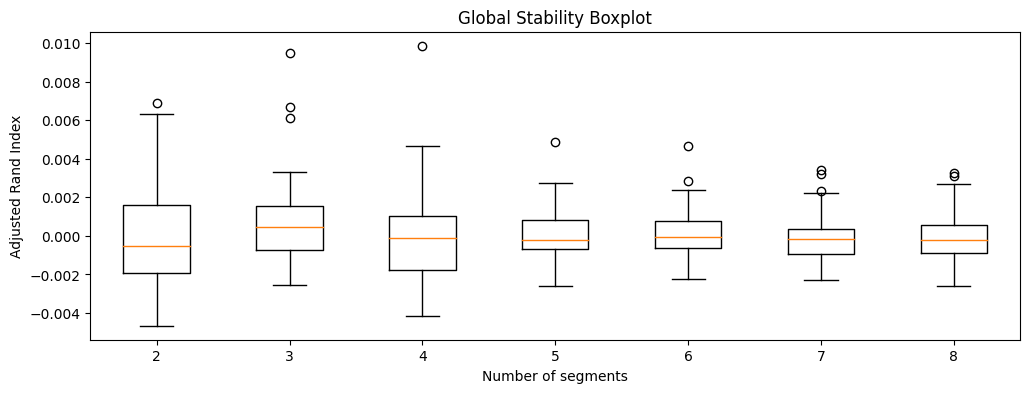

In [87]:
def bootstrap_stability(data, n_clusters, n_boot=100, n_rep=10):
    stability_scores = []

    for _ in range(n_boot):
        sample = resample(data)
        model = KMeans(n_clusters=n_clusters, n_init=n_rep, random_state=1234)
        model.fit(sample)
        labels = model.predict(data)
        stability = adjusted_rand_score(model.labels_, labels)
        stability_scores.append(stability)

    return stability_scores


n_segments = range(2, 9)
stability_results = {k: bootstrap_stability(MD_x, k) for k in n_segments}


fig, ax = plt.subplots(figsize=(12,4))
ax.boxplot([stability_results[k] for k in n_segments], labels=n_segments)
ax.set_xlabel('Number of segments')
ax.set_ylabel('Adjusted Rand Index')
ax.set_title('Global Stability Boxplot')
plt.show()

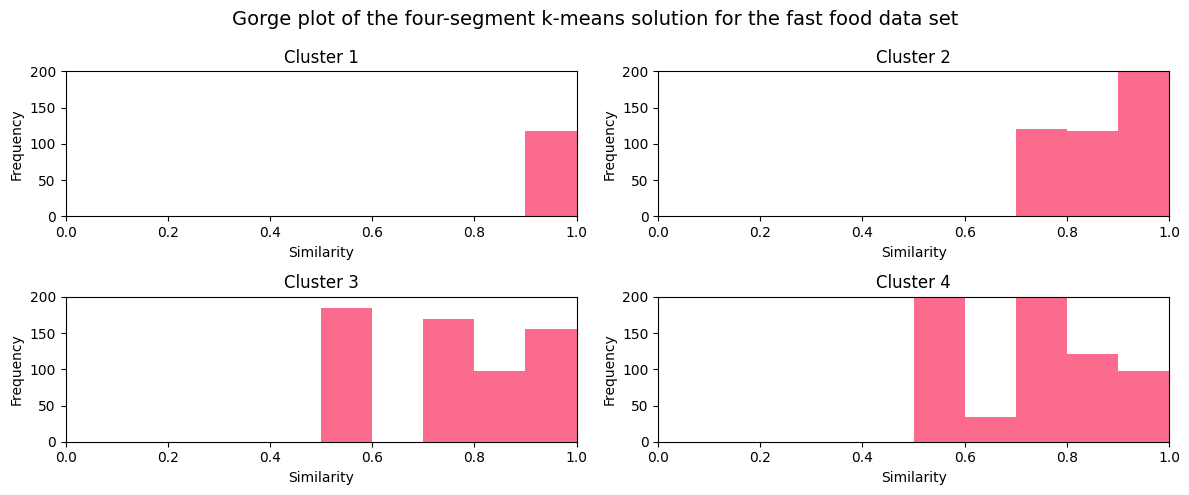

In [122]:
kmeans_data = {}
K = range(1,12)

for i in K:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(MD_x)
    kmeans_data[str(i)] = kmeans

fig, axs = plt.subplots(2, 2, figsize=(12, 5))

for i in range(1, 5):
    similarities = kmeans_data[str(i)].transform(MD_x).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=10, range=(0,1), color='#FC6A8D')
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('Cluster {}'.format(i), size=12)
    axs[row, col].set_xlim(0, 1)
    axs[row, col].set_ylim(0, 200)
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])


fig.suptitle("Gorge plot of the four-segment k-means solution for the fast food data set", size=14)
plt.tight_layout()
plt.show()

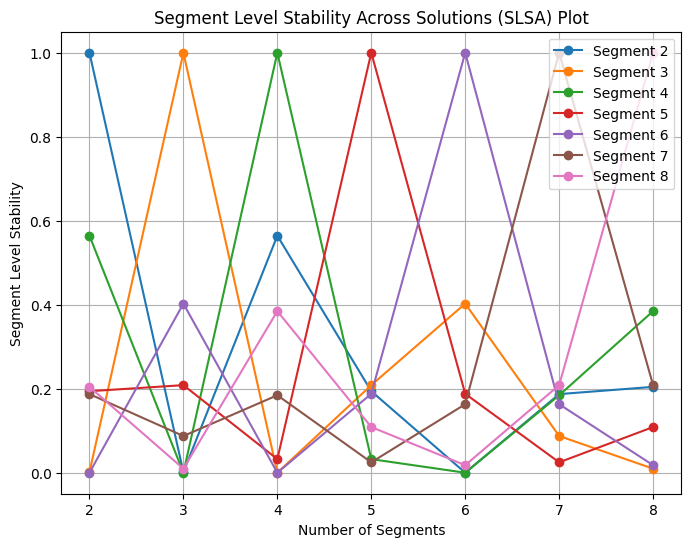

In [89]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = kmeans_data[str(segment)].predict(MD_x)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

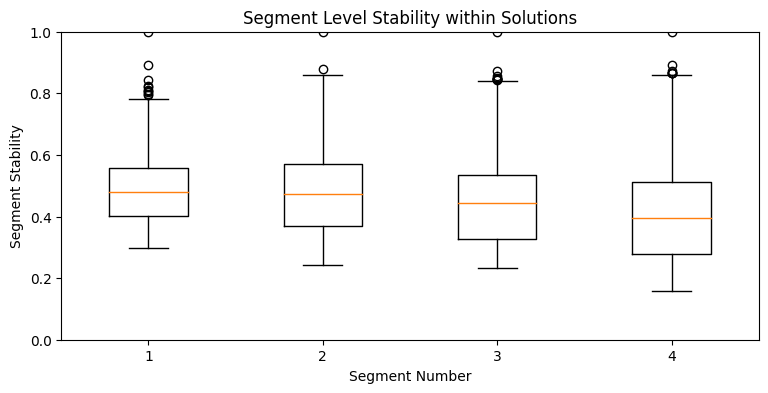

In [90]:
segment_labels = {}
segment_similarities = {}

for i in range(2,6):
    segment_labels[str(i)] = kmeans_data[str(i)].predict(MD_x)
    segment_similarities[str(i)] = kmeans_data[str(i)].transform(MD_x).min(axis=1)

segment_stability_values = []
for i in range(2,6):
    similarities = segment_similarities[str(i)]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)


plt.figure(figsize=(9,4))
plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, 5))
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")
plt.show()

## 5.2 Using Mixtures of Distributions

In [91]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234, n_init='auto')
    model.fit(MD_x.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD_x.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0    10       True  2   2 -2146.062044  4296.124088  4306.686859  4306.015908
1     5       True  3   3 -1896.330266  3798.660532  3814.504689  3813.529671
2     9       True  4   4 -1603.913802  3215.827604  3236.953147  3235.627738
3     9       True  5   5 -1502.697153  3015.394306  3041.801234  3040.267284
4     7       True  6   6 -1348.665399  2709.330799  2741.019113  2739.277954
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6     9       True  8   8 -1203.646165  2423.292330  2465.543415  2463.533662


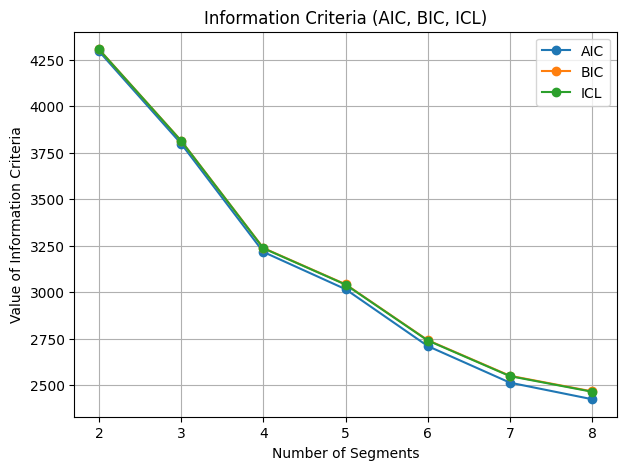

In [92]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')
plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
from sklearn.mixture import GaussianMixture

In [94]:
# Contingency Table
kmeans = KMeans(n_clusters=4, random_state=1234, n_init='auto')
kmeans.fit(MD_x)
kmeans_clusters = kmeans.predict(MD_x)

gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

print("Contingency Table:")
contingency_table = pd.crosstab(results['kmeans'], results['mixture'])
contingency_table

Contingency Table:


mixture,0,1,2,3
kmeans,,,,
0,546,0,1,33
1,0,213,11,4
2,46,3,265,8
3,29,38,0,256


## 5.3 Using Mixtures of Regression Models

In [95]:
gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD_x)

log_likelihood_m4a = gmm_m4a.score(MD_x)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD_x)

log_likelihood_m4 = gmm_m4.score(MD_x)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 9.456781748071887
Log-likelihood for MD.m4: 3.6427464011765807


In [96]:
pd.value_counts(mcdonalds['Like'])

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [97]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I hate it!-5': -5,
    'I love it!+5' : +5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
}

mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)

like_n_counts = mcdonalds['Like.n'].value_counts().sort_index()

print(like_n_counts)

Like.n
-5    152
-4     71
-3     73
-2     59
-1     58
 0    169
 1    152
 2    187
 3    229
 4    160
 5    143
Name: count, dtype: int64


In [98]:
from patsy import dmatrices, dmatrix

independent_vars = mcdonalds.columns[0:11]

formula_str = 'Like ~ ' + ' + '.join(independent_vars)

f = dmatrices(formula_str, data=mcdonalds)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [99]:
X = dmatrix(f.design_info, data=mcdonalds)
y = dmatrix('Like', data=mcdonalds)

model = GaussianMixture(n_components=2, n_init=10, verbose=False)
reg_model  = model.fit(X, y)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

Cluster sizes:
1: 985
2: 468


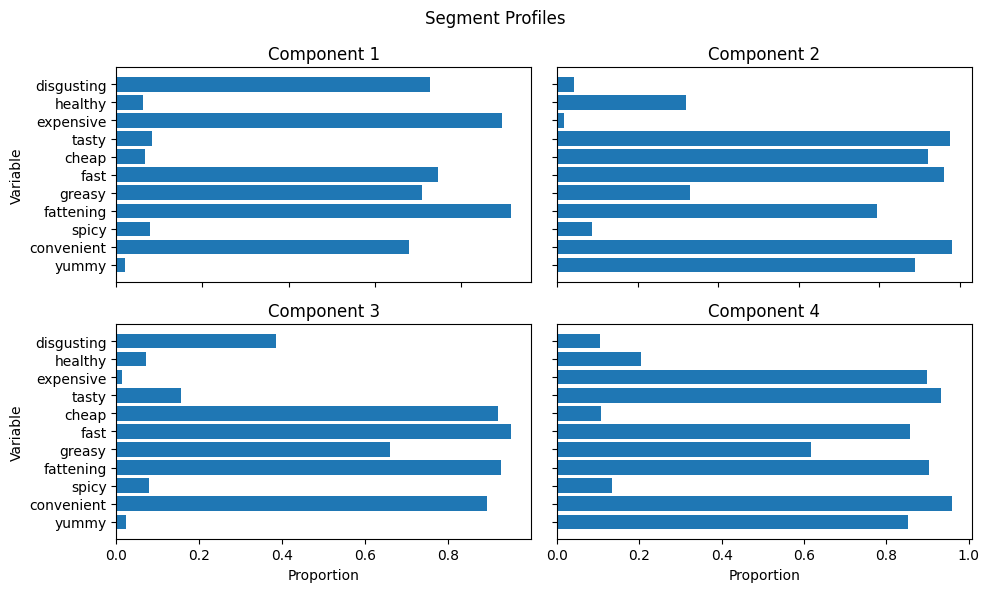

In [100]:
kmeans = kmeans_data['4']

labels = kmeans.labels_

MD_mean = MD_x.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_x.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()


# 6. Profiling Segments

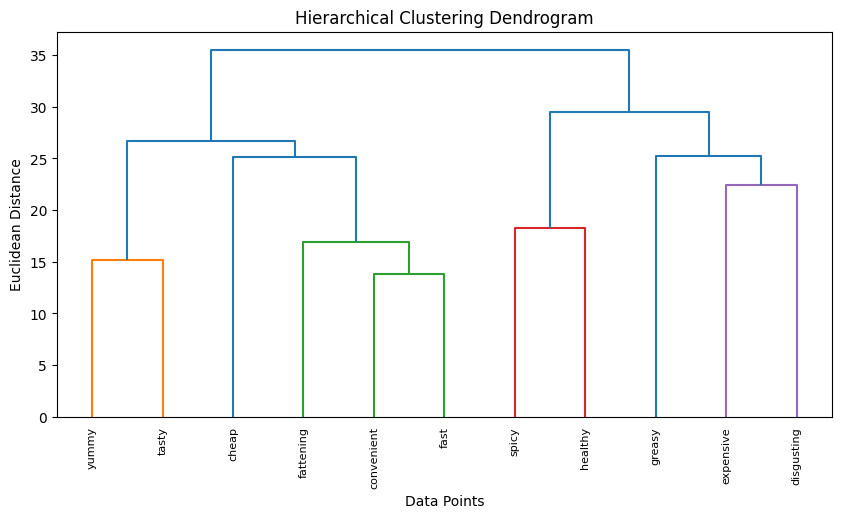

In [101]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering
MD_vclust = linkage(MD_x.transpose(), method='complete')

# Create a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 5))
dendrogram(MD_vclust, labels=MD_x.columns, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [102]:
loadings = pca.components_.T

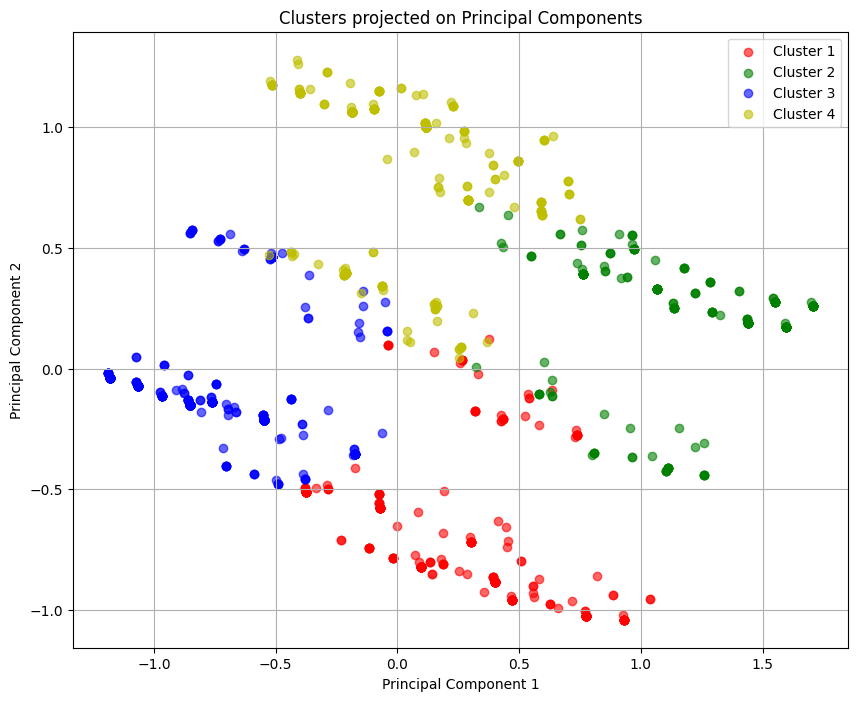

In [103]:
pca = PCA(n_components =2)
MD_pca = pca.fit_transform(MD_x)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
MD_k4 = kmeans.fit_predict(MD_x)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(MD_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = MD_k4

# Create the plot
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'y']
for i in range(4):  # Adjust the number of clusters if necessary
    cluster = df_plot[df_plot['Cluster'] == i]
    plt.scatter(cluster['PC1'], cluster['PC2'], c=colors[i], label=f'Cluster {i+1}', alpha=0.6)


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters projected on Principal Components')
plt.legend()
plt.grid(True)
plt.show()

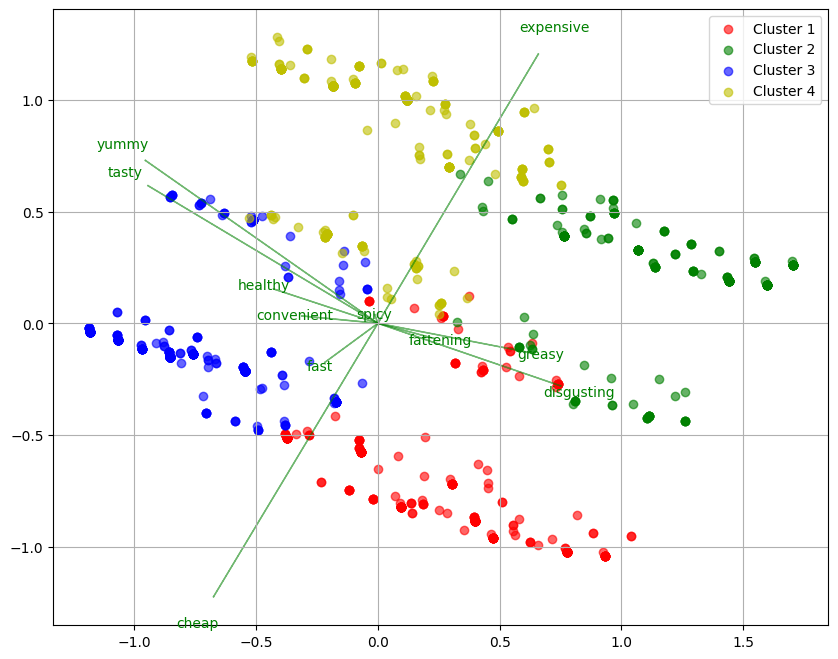

In [104]:
# showing the cluster solution

plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'y']
for i in range(4):  # Adjust the number of clusters if necessary
    cluster = df_plot[df_plot['Cluster'] == i]
    plt.scatter(cluster['PC1'], cluster['PC2'], c=colors[i], label=f'Cluster {i+1}', alpha=0.6)


def plot_proj_axes(loadings, labels):
    for i, label in enumerate(labels):
        plt.arrow(0, 0, loadings[i, 0]*2, loadings[i, 1]*2, color='g', alpha=0.5)
        plt.text(loadings[i, 0]*2.2, loadings[i, 1]*2.2, label, color='g', ha='center', va='center')

feature_names = MD_x.columns[:11]
plot_proj_axes(loadings[:, :2], feature_names)

plt.legend()
plt.grid(True)
plt.show()


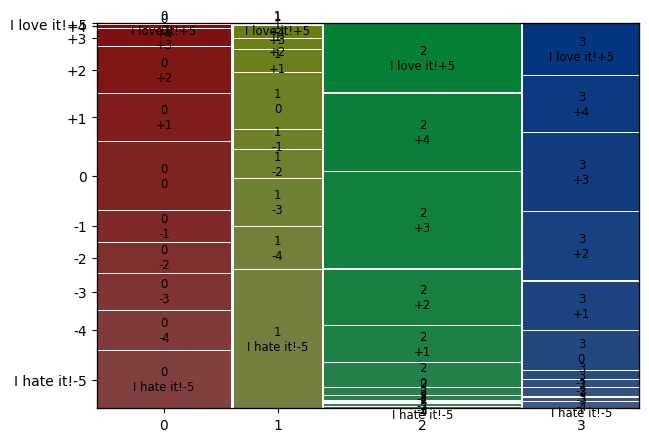

In [105]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    mcdonalds1[x] = LabelEncoder().fit_transform(mcdonalds1[x])
    return mcdonalds1

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df_eleven = mcdonalds1.loc[:,cat]

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=1234).fit(df_eleven)
mcdonalds1['cluster_num'] = kmeans.labels_
crosstab =pd.crosstab(mcdonalds1['cluster_num'],mcdonalds1['Like'])

#Reordering cols
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

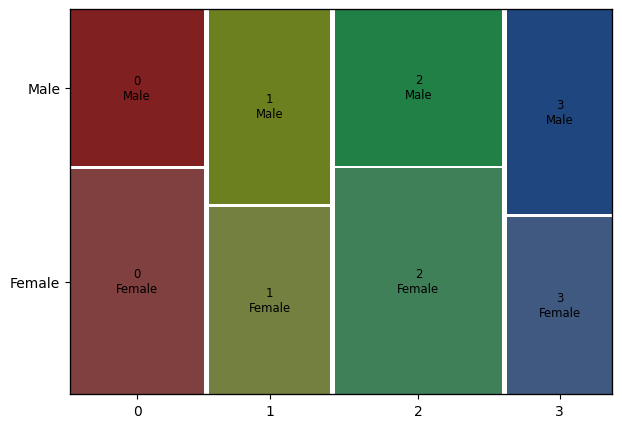

In [106]:
from statsmodels.graphics.mosaicplot import mosaic

kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(MD_x)

ct = pd.crosstab(kmeans.labels_, mcdonalds['Gender'])
mosaic(ct.stack(),gap=0.01)

plt.show()

In [107]:
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'Like.n'],
      dtype='object')

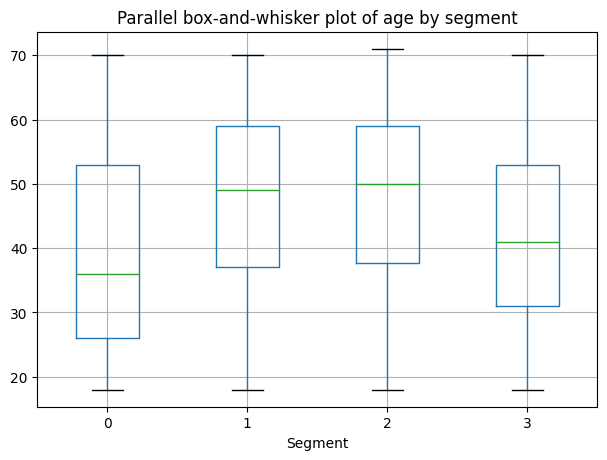

In [108]:
df = pd.DataFrame({'Segment': kmeans.labels_, 'Age': mcdonalds['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [109]:
GenderCrossTab = pd.crosstab(mcdonalds1['cluster_num'],mcdonalds['Gender'])
GenderCrossTab

Gender,Female,Male
cluster_num,,
0,213,151
1,101,139
2,324,209
3,150,166


In [110]:

mcdonalds1['Like'] = LabelEncoder().fit_transform(mcdonalds1['Like'])
Like = mcdonalds1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.109890
1,1,6.741667
2,2,3.868668
3,3,3.787975


In [111]:
mcdonalds1['Gender'] = LabelEncoder().fit_transform(mcdonalds1['Gender'])
Gender = mcdonalds1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.414835
1,1,0.579167
2,2,0.392120
3,3,0.525316


In [112]:
mcdonalds1['VisitFrequency'] = LabelEncoder().fit_transform(mcdonalds1['VisitFrequency'])
visit = mcdonalds1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.730769
1,1,2.691667
2,2,2.602251
3,3,2.550633


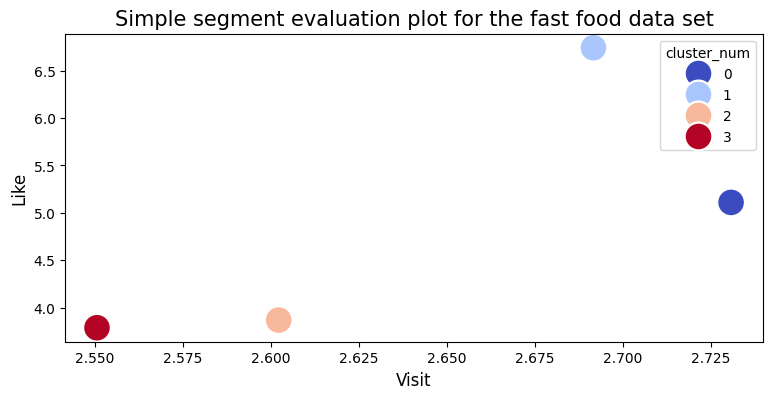

In [113]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400,hue='cluster_num', palette='coolwarm')
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()